## Импорт библиотек

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [185]:
import warnings

warnings.filterwarnings('ignore')

## Датасет

In [186]:
#Сделаем так, чтобы отображались все колонки
pd.set_option('display.max_columns', 100)

In [187]:
df = pd.read_csv('games_metadata_profile_2024_01.csv')

In [188]:
df.head()

,GameID,Event,Round,Site,Date,Time,White,WhiteElo,WhiteRatingDiff,White_is_deleted,White_tosViolation,White_profile_flag,White_createdAt,White_playTime_total,White_count_all,White_title,Black,BlackElo,BlackRatingDiff,Black_is_deleted,Black_tosViolation,Black_profile_flag,Black_createdAt,Black_playTime_total,Black_count_all,Black_title,Moves,TotalMoves,ECO,Opening,TimeControl,Termination,Result
0,1,Rated Blitz game,-,https://lichess.org/FTXRGHsh,2024.01.01,00:00:08,EyalSa,1550,-6.0,False,NaN,NaN,1.646943e+12,5743321.0,8428.0,NaN,saiyank_24,1492,7.0,False,NaN,NaN,1.687320e+12,1410838.0,2700.0,NaN,1. d4 { [%eval 0.13] [%clk 0:05:00] } 1... d5 ...,54,D06,Queen's Gambit Declined: Marshall Defense,300+3,Time forfeit,0-1
1,2,Rated Bullet game,-,https://lichess.org/WlpQqus4,2024.01.01,00:00:18,Frogman33,1082,9.0,False,NaN,GB,1.521151e+12,1395490.0,3160.0,NaN,tausgang,1155,-7.0,False,NaN,DE,1.585999e+12,2091417.0,4924.0,NaN,1. d4 { [%eval 0.13] [%clk 0:02:00] } 1... d5 ...,63,D00,Queen's Pawn Game,120+1,Time forfeit,1-0
2,3,Rated Blitz game,-,https://lichess.org/HzbO1wkJ,2024.01.01,00:00:34,Tomi_Viper,1593,-5.0,False,NaN,NaN,1.676814e+12,384800.0,792.0,NaN,xiangqishogichess,1641,5.0,False,NaN,NaN,1.594784e+12,1424148.0,4085.0,NaN,1. e4 { [%eval 0.2] [%clk 0:05:00] } 1... c6 {...,52,B10,Caro-Kann Defense,300+3,Time forfeit,0-1
3,4,Rated Rapid game,-,https://lichess.org/hjgvXMvo,2024.01.01,00:01:26,pony14,2289,-5.0,False,NaN,NaN,1.694284e+12,1154156.0,2352.0,NaN,Depth25,2307,5.0,False,NaN,NaN,1.688279e+12,1195075.0,1772.0,NaN,1. Nf3 { [%eval 0.2] [%clk 0:10:00] } 1... Nf6...,128,D78,"Neo-Grünfeld Defense: Classical Variation, Ori...",600+0,Normal,0-1
4,5,Rated Rapid game,-,https://lichess.org/VtuIOQzk,2024.01.01,00:02:20,Niccosan,1205,6.0,False,NaN,NaN,1.628263e+12,886600.0,1684.0,NaN,aymenaymenaymenaymen,1214,-6.0,False,NaN,NaN,1.673813e+12,332692.0,576.0,NaN,1. e4 { [%eval 0.2] [%clk 0:10:00] } 1... d5?!...,65,B01,Scandinavian Defense: Mieses-Kotroc Variation,600+0,Normal,1-0


In [189]:
print('В датафрейме мы можем наблюдать следующие столбцы:')
print(*list(df.columns), sep='; ')

В датафрейме мы можем наблюдать следующие столбцы:
GameID; Event; Round; Site; Date; Time; White; WhiteElo; WhiteRatingDiff; White_is_deleted; White_tosViolation; White_profile_flag; White_createdAt; White_playTime_total; White_count_all; White_title; Black; BlackElo; BlackRatingDiff; Black_is_deleted; Black_tosViolation; Black_profile_flag; Black_createdAt; Black_playTime_total; Black_count_all; Black_title; Moves; TotalMoves; ECO; Opening; TimeControl; Termination; Result


Сам датафрейм был взят из открытой базы данных lichess.org

Скажем пару слов о том какие данные хранятся в каждом из столбцов датафрейма:
1. GameID - уникальный идентификационный номер игр. DataType - int64
2. Event - название или тип шахматного соревнования. DataType - object
3. Round - обозначает последовательность игр в рамках турнира, отражающую их хронологический порядок. DataType - object
4. Site - ссылку на игру на lichess.org. DataType - object
5. Date - день, в который игра была сыграна. DataType - object
6. Time - время, в которое игра была сыграна. DataType - object
7. White - имя пользователя или идентификатор игрока, игравшего белыми фигурами. DataType - object
8. WhiteElo - шахматный рейтинг(эло) белого игрока. DataType - int64
9. WhiteRatingDiff - изменение рейтинга эло белого игрока в результате игры. DataType - float64
10. White_is_deleted - указывает, была ли удалена учётная запись белого игрока в результате игры. DataType - bool
11. White_tosViolation - указывает, нарушил ли белый игрок условия предоставления услуг. DataType - object(bool)
12. White_profile_flag - указывает, установлен ли флаг страны в профиле игрока. DataType - object 
13. White_createdAt - дата создания (в формате unix) учетной записи белого игрока. DataType - float64
14. White_playTime_total - общее время игры (секунды) белого игрока на платформе. DataType - float64
15. White_count_all - общее количество игр, сыгранных белым игроком. DataType - float64
16. White_title - шахматный титул белого игрока, если таковой имеется (например, GM, IM, FM). DataType - object
17. Black - имя пользователя или идентификатор игрока, игравшего черными фигурами. DataType - object
18. BlackElo - шахматный рейтинг(эло) черного игрока. DataType - int64
19. BlackRatingDiff - изменение рейтинга эло черного игрока в результате игры. DataType - float64
20. Black_is_deleted - указывает, была ли удалена учётная запись черного игрока в результате игры. DataType - bool
21. Black_tosViolation - указывает, нарушил ли черный игрок условия предоставления услуг. DataType - object(bool)
22. Black_profile_flag - указывает, установлен ли флаг страны в профиле игрока. DataType - object
23. Black_createdAt - дата создания (в формате unix) учетной записи черного игрока. DataType - float64
24. Black_playTime_total - общее время игры (секунды) черного игрока на платформе. DataType - float64
25. Black_count_all - общее количество игр, сыгранных черным игроком. DataType - float64
26. Black_title - шахматный титул черного игрока, если таковой имеется (например, GM, IM, FM). DataType - object
27. Moves - cтрока ходов в игре в стандартной алгебраической нотации (включая комментарии к оценкам и часам). DataType - object
28. TotalMoves - общее количество ходов в игре. DataType - int64
29. ECO - код дебюта в энциклопедии шахматных дебютов. DataType - object
30. Opening - название дебюта, сыгранного в игре. DataType - object
31. TimeControl - настройки времени в игре(например, "60+0"(пуля) 60 секунд без приращения). DataType - object
32. Termination - определяет завершение шахматной партии, указывая, закончилась ли она шахом, патовой ситуацией, потерей времени или другими условиями. DataType - object
33. Result - результат игры ("1-0" - победа белых, "0-1" - победа черных, "1/2-1/2" - ничья). DataType - object

Фильтрации: дебют гамбит / не гамбит, по играм вничью, игры где хотя бы один игрок удалил свой аккаунт, 
фильтрация по типу игры: блиц, классика и т.п., фильтрация по типу завершения партии: по времени, сдался и т.п.

Сортировки: по количеству ходов, по разнице в рейтинге, по суммарному количеству сыгранных игр(посмотреть на игру самых опытных людей)

Корреляции: между рейтингами и сыгранными партиями, между разница

In [190]:
print(f'Всего в нашем датафрейме имеется {len(df)} партий')

Всего в нашем датафрейме имеется 130922 партий


## Исследование

Отфильтруем датафрейм и оставим только те игры, в которых игрался дебют Гамбит. P.S. Гамбит - это общее название дебютов, в которых одна из сторон в интересах скорейшего развития, захвата центра или просто обострения игры жертвует материал(обычно пешку, но иногда и лёгкую фигуру)

In [191]:
gambit_opening = df[df['Opening'].str.contains('Gambit', case=False)]
not_gambit_opening = df[~df['Opening'].str.contains('Gambit', case=False)]

Посчитаем теперь, в какой части игр встречается дебюты, которые входят в класс гамбитов

In [192]:
print(f'Гамбит встречается в качестве дебюта в {round(len(gambit_opening) / len(df) * 100, 2)}% игр.')

Гамбит встречается в качестве дебюта в 15.21% игр.


Видим, что гамбит - не самый частый вид дебюта. Действительно, нечасто игроки готовы идти на риск и жертвовать материал
в самом начале игры

Посмотрим теперь на то, как отличается средний рейтинг игроков, которые используют гамбит в своих игр и которые не используют. Можно было бы предложить гипотезу, что средний рейтинг игроков, которые используют гамбит будет выше, потому что более опытные игроки чаще готовы идти на риски, ибо они хорошо знают как компенсировать пожертвованный материал

In [193]:
print(f'''Средний рейтинг игроков, которые используют в своих играх гамбиты:
White: {round(gambit_opening['WhiteElo'].mean())};
Black: {round(gambit_opening['BlackElo'].mean())}

Средний рейтинг игроков, которые не используют в своих играх гамбиты:
White: {round(not_gambit_opening['WhiteElo'].mean())};
Black: {round(not_gambit_opening['BlackElo'].mean())}''')

Средний рейтинг игроков, которые используют в своих играх гамбиты:
White: 1621;
Black: 1615

Средний рейтинг игроков, которые не используют в своих играх гамбиты:
White: 1617;
Black: 1619


Даже не проводя статистические тесты, невооруженным глазом видно, что рейтинги игроков не отличаются статистически значимо. Гипотеза опровергнута

Отфильтруем теперь наш датафрейм по результатам игр: оставим только те игры, которые закончились ничьёй

In [194]:
draw_games = df[df['Result'] == '1/2-1/2']

Посмотрим, какая часть игр заканчивается ничьей

In [195]:
print(f'Ничейным результатом заканчивается {round(len(draw_games) / len(df) * 100, 2)}% игр')

Ничейным результатом заканчивается 3.49% игр


Введём новый столбец, который отображает, насколько высокий рейтинг у игроков, которые принимают участие в данной игре. Если среднее арифметическое рейтинга белого и чёрного игрока меньше 1400, будем считать такую игру низкорейтинговой, если между 1400 и 2100 - среднерейтинговой, если больше 2100 - высокорейтинговой. Предполагаем, что подбор игр на lichess.com осуществляется таким образом, что в подавляющем большинстве случаев рейтинги игроков, которые играют друг против друга, отличаются несущественно

In [196]:
df['game_rating'] = np.where((df['BlackElo'] + df['WhiteElo']) / 2 <= 1400, 'low rating', np.where(((df['BlackElo'] + df['WhiteElo']) / 2 > 1400) & ((df['BlackElo'] + df['WhiteElo']) / 2 <= 2100), 'medium rating', 'high rating'))
draw_games['game_rating'] = np.where((draw_games['BlackElo'] + draw_games['WhiteElo']) / 2 <= 1400, 'low rating', 
    np.where(((draw_games['BlackElo'] + draw_games['WhiteElo']) / 2 > 1400) & ((draw_games['BlackElo'] + draw_games['WhiteElo']) / 2 <= 2100), 'medium rating', 'high rating'))

Посмотрим теперь на распределение количества ничей по рейтингу игр в процентах в исходном датафрейме и в датафрейме с ничейными партиями. Построим частотные таблицы в процентах

Исходный датафрейм:

In [197]:
a = pd.DataFrame(round(df.groupby('game_rating')['game_rating'].agg(len) / len(df) * 100, 2))
a.columns = ['proportion']
a

,proportion
game_rating,
high rating,12.49
low rating,30.90
medium rating,56.62


Датафрейм, в котором есть только ничейные партии:

In [198]:
a = pd.DataFrame(round(draw_games.groupby('game_rating')['game_rating'].agg(len) / len(draw_games) * 100, 2))
a.columns = ['proportion']
a

,proportion
game_rating,
high rating,23.23
low rating,19.07
medium rating,57.71


Видим, что распределения разные. Визуализируем с помощью гистограмм

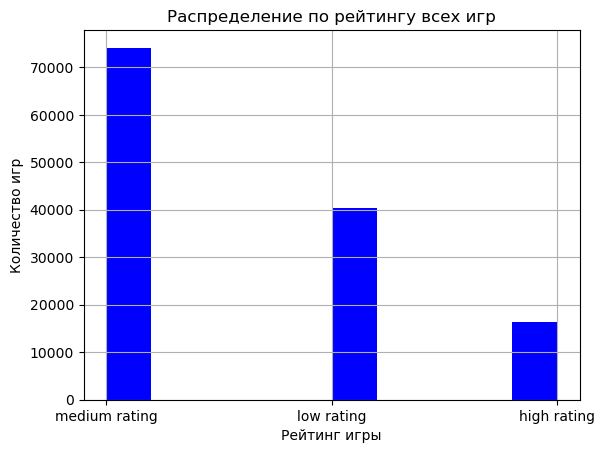

In [199]:
df['game_rating'].hist(color='blue')
plt.title('Распределение по рейтингу всех игр')
plt.xlabel('Рейтинг игры')
plt.ylabel('Количество игр')
plt.show()

Распределение игр по рейтингу

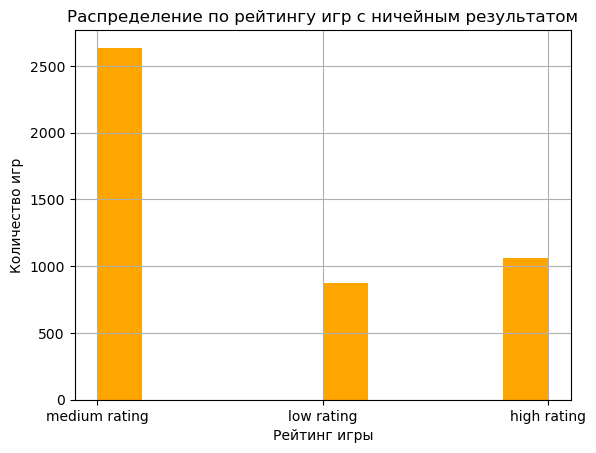

In [200]:
draw_games['game_rating'].hist(color='orange')
plt.title('Распределение по рейтингу игр с ничейным результатом')
plt.xlabel('Рейтинг игры')
plt.ylabel('Количество игр')
plt.show()

Видим, что ничейные результаты встречаются чаще в играх с более высокорейтинговыми игроками. Этот результат достаточно ожидаемый. Действительно, более высококлассные игроки реже допускают ошибки, отдавая преимущество сопернику, поэтому игры между такими игроками будут чаще заканчиваться ничейным результатом

Теперь попробуем отфильтровать по признаку White(Black)_is_deleted, который показывает, удалил ли Белый(Чёрный) игрок учётную запись после игры

In [201]:
someone_deleted_acc = df[(df['White_is_deleted'] == True) | (df['Black_is_deleted'] == True)]

Посмотрим на то, какой процент активных игроков за месяц(игроки которые сыграли хотя бы одну игру за месяц) удалило аккаунт

In [202]:
#посчитаем сколько людей после конкретной игры удалило аккаунт
someone_deleted_acc['cnt_deleted'] = someone_deleted_acc['White_is_deleted'].astype(int) + someone_deleted_acc['Black_is_deleted'].astype(int)
players_cnt = len(np.unique(np.concatenate((df['White'].values, df['Black'].values)))) #количество активных игроков в этом месяце
cnt_deleted = someone_deleted_acc['cnt_deleted'].sum() #кол-во игроков, удаливших аккаунт

print(f'В феврале 2024 года {round(cnt_deleted / players_cnt * 100, 2)}% активных игроков удалили свой аккаунт')

В феврале 2024 года 2.53% активных игроков удалили свой аккаунт


Интересно посмотреть, какое среднее количество игр было сыграно игроками перед тем как удалить свой аккаунт

In [203]:
#Сложим общее количество игр всех игроков которые удалили свой аккаунт в один список
all_count = np.array([])
for index, row in someone_deleted_acc.iterrows():
    if row['White_is_deleted'] is True:
        all_count = np.append(all_count, row['White_count_all'])
    if row['Black_is_deleted'] is True:
        all_count = np.append(all_count, row['White_count_all'])

all_count

array([  nan, 4634.,   nan, ...,   nan, 1866., 1842.])

Мы уже можем видеть что в этом массиве много пропущенных значений

In [204]:
print(f'В массиве all_count всего {round(np.sum(np.isnan(all_count)) / len(all_count) * 100, 2)}% пропущенных значений')

В массиве all_count всего 52.0% пропущенных значений


Эти пропущенные значения соответствуют случаю, когда игрок до этого не сыграл ни одной игры на данном аккаунте. Заменим значения NaN значениями 0 в нашем массиве

In [205]:
all_count = np.nan_to_num(all_count, 0)

Найдём теперь исходное среднее

In [206]:
round(np.mean(all_count))

5664

В среднем игроки удаляют аккаунт, сыграв 5664 игр. Но можно ли верить этой статистике? Посчитаем некоторые другие статистики нашего распределения

In [207]:
print(f'''
    Медиана: {np.median(all_count)};
    Максимальное значение: {np.max(all_count)}
''')


    Медиана: 0.0;
    Максимальное значение: 804678.0



Другая мера центральной тенденции - медиана показывает нулевое значение, это совсем не похоже на среднее. Среднее - крайне не робастая метрика, поэтому такое различие может указывать на наличие больших выбросов в наших данных. Убедимся в этом, построив ящик с усами

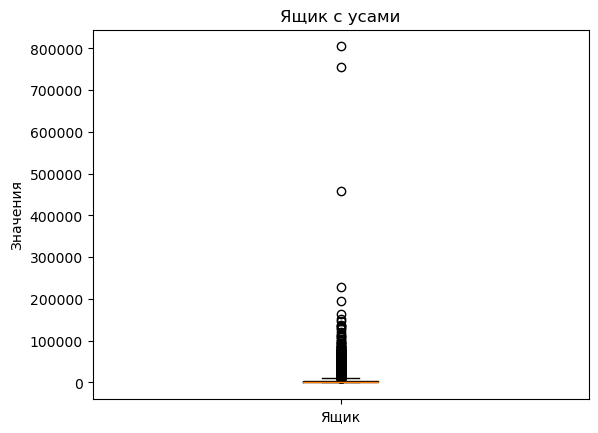

In [208]:
plt.boxplot(all_count)
plt.title('Ящик с усами')
plt.ylabel('Значения')
plt.xticks([1], ['Ящик'])
plt.show()

Действительно, видим что у нас есть много больших по величине выбросов, что достаточно сильно искажает картину
Это поучительный пример, который демонстрирует, что не стоит слепо доверять такой метрике как среднее. Нужно относиться к их значениям с некой осторожностью.

In [209]:
print(f'Всего {round(list(all_count).count(0) / len(all_count) * 100, 2)}% пользователей, удаливших аккаунт, сделали после первой же игры')
print(f'Всего после первой игры аккаунт удаляют {round(list(all_count).count(0) / players_cnt * 100, 2)}% пользователей')

Всего 52.0% пользователей, удаливших аккаунт, сделали после первой же игры
Всего после первой игры аккаунт удаляют 1.31% пользователей


Добавим столбец с новым признаком - тип временного контроля(заочные шахматы(временной контроль от 8 часов и более)/классика(временной контроль от часа и до 8 часов)/рапид(временной контроль от 10 минут до 60 минут)/блиц(временной контроль от 2 минут до 10 минут)/пуля(временной контроль до 2 минут))

In [210]:
minutes = df['TimeControl'].str.split('+').str[0].replace('-', -1).astype(int)
df['TimeControl_type'] = np.where(
    minutes >= 480, 'daily', np.where(
        minutes >= 60 , 'classic', np.where(
            minutes >= 10, 'rapid', np.where(
                minutes >= 2, 'blitz', np.where(
                    minutes >= 0, 'bullet', None
                )
            )
        )
    )
)

Отфильтруем датафрейм по нашему новому признаку. Возьмём только те игры, которые прошли в формате "пуля"

In [211]:
bullet_games = df[df['TimeControl_type'] == 'bullet']

Посмотрим, насколько популярен этот формат игры

In [212]:
print(f'В режиме "пуля" прошло всего {round(len(bullet_games) / len(df) * 100, 2)}% игр')

В режиме "пуля" прошло всего 0.12% игр


Видим, что это не самый популярный формат игры. Посмотрим на распределение популярности по режимам, создав частотную таблицу

In [213]:
round(df['TimeControl_type'].value_counts(normalize=True) * 100, 2).reset_index()

,TimeControl_type,proportion
0,classic,68.28
1,daily,30.52
2,rapid,1.09
3,bullet,0.12


Визуализируем распределение популярности по режимам, построив круговую диаграмму

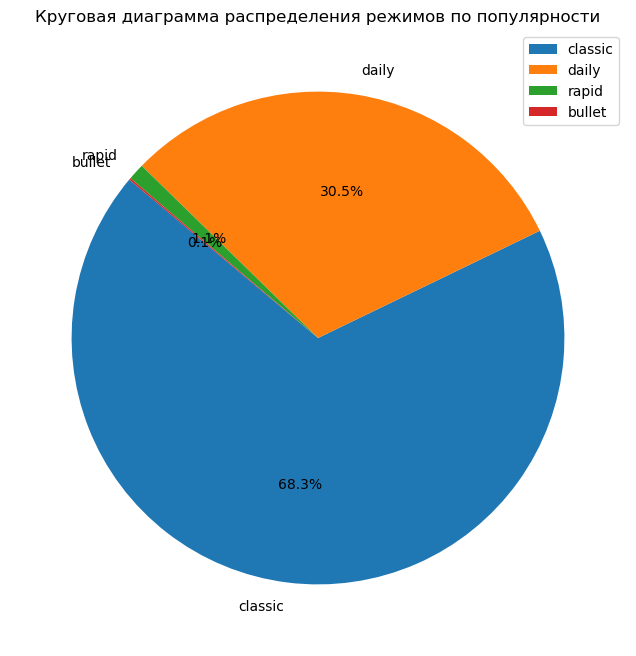

In [214]:
plt.figure(figsize=(8, 8))
values = (df['TimeControl_type'].value_counts(normalize=True) * 100).values
labels = (df['TimeControl_type'].value_counts(normalize=True) * 100).index
plt.pie(values,  autopct='%1.1f%%',labels=labels, startangle=140)
plt.title('Круговая диаграмма распределения режимов по популярности')
plt.legend()
plt.show()

Видим, что наибольшей популярностью у игроков пользуются классические шахматы, наименьшей - пуля.

Теперь обратим внимание на окончания партии. Посмотрим, какие они бывают в нашем датасете

In [215]:
print('Возможные окончания:')
print(*list(df['Termination'].unique()), sep=', ')

Возможные окончания:
Time forfeit, Normal, Rules infraction, Abandoned


Поясним, что означает каждый из них. Time forfeit - окончание времени у одного из участников игры или, как говорят шахматисты, "падение флага". Normal - окончание партии в виде мата/пата или добровольной капитуляции одного из игроков. Rules infraction - нарушение правил игры на сайте lichess.com. Например: использование сторонних программ, которые дают нечестное преимущество над соперником(иными словами, читов). Abandoned - это явление при котором один из игроков "забрасывает" партию и перестаёт предпринимать какие-либо действия. Вообще говоря, это тоже нарушение и при частых повторениях оного на игрока должны быть наложены некоторые санкции.

Построим частотную таблицу по окончаниям партии

In [216]:
df['Termination'].value_counts().reset_index()

,Termination,count
0,Normal,100883
1,Time forfeit,30033
2,Rules infraction,5
3,Abandoned,1


Видим что подавляющее большинство игр заканчивается "нормально"(мат или ничья) и истечением времени у одного из соперников

Оставим в нашем датафрейме только те партии, которые были проведены с нарушением правил со стороны одного из игроков

In [217]:
rules_infraction = df[df['Termination'] == 'Rules infraction']

Посмотрим на то, сколько игр прошло с нарушениями правил

In [218]:
print(f'Нарушения со стороны игроков были замечены в {len(rules_infraction)} играх из {len(df)}, это {round(len(rules_infraction) / len(df) * 100, 3)}%')

Нарушения со стороны игроков были замечены в 5 играх из 130922, это 0.004%


Видим, что нарушения были зафиксированы в ничтожно малом количестве игр. Варианта два: либо игроки lichess.org очень честные, либо система детектирования нарушений крайне несовершенна

Посмотрим теперь на то, сколько игр завершилось падением флага

In [219]:
time_forfeit = df[df['Termination'] == 'Time forfeit']
print(f'Всего истечением времени завершилось {len(time_forfeit)} партий из {len(df)}. Это {round(len(time_forfeit) / len(df) * 100, 2)}%')

Всего истечением времени завершилось 30033 партий из 130922. Это 22.94%


Теперь произведём фильтрацию по игрокам с высоким эло и множественными нарушениями правил(игры в которых правила нарушили сразу оба игрока)

In [220]:
high_elo_tos_violation = df[(df['WhiteElo'] > 2000) & (df['BlackElo'] > 2000) & (df['White_tosViolation'] == True) & (df['Black_tosViolation'] == True)]
print(f'Всего игр с высокорейтинговыми игроками, где оба нарушили правила: {len(high_elo_tos_violation)} из {len(df)}, это {round(len(high_elo_tos_violation) / len(df) * 100, 3)}% от общего количества')

Всего игр с высокорейтинговыми игроками, где оба нарушили правила: 33 из 130922, это 0.025% от общего количества


Также интересно посмотреть на игроков, которые сыграли большое количество партий, при этом у них низкий рейтинг

In [221]:
white_players = df[['White', 'WhiteElo', 'White_count_all']]
white_players.columns = ['Player', 'Elo', 'count_all']
black_players = df[['Black', 'BlackElo', 'Black_count_all']]
black_players.columns = ['Player', 'Elo', 'count_all']

players = pd.concat((white_players, black_players)).groupby('Player').max()

In [222]:
low_elo_high_playtime = players[(players['Elo'] < 1400) & (players['Elo'] < 1400) & (players['count_all'] > 10000) & (players['count_all'] > 10000)]
print(f'Игроков, которые сыграли много игр(более 10000), но при этом остаются на низком рейтинге(ниже 1400 эло) всего {len(low_elo_high_playtime)} из {len(players)}, это {round(len(low_elo_high_playtime) / len(players) * 100, 2)}%')

Игроков, которые сыграли много игр(более 10000), но при этом остаются на низком рейтинге(ниже 1400 эло) всего 4243 из 202566, это 2.09%


Посмотрим партии, в которых рейтинг белого превосходил рейтинг чёрного игрока более чем на 10% и при этом чёрный игрок одержал победу

In [223]:
df['RatingDiff'] = df['WhiteElo'] - df['BlackElo']

black_outsider_won = df[(df['RatingDiff'] > df['BlackElo'] * 0.1) & (df['Result'] == '0-1')]

Теперь найдём общее количество игр в которых рейтинг белого превосходит рейтинг чёрного более чем на 10% и посмотрим в каком проценте игр оутсайдер, который играет чёрными, одерживает победу

In [224]:
black_outsider = df[df['RatingDiff'] > df['BlackElo'] * 0.1]
black_won = round(df['Result'].value_counts(normalize=True)['0-1'] * 100, 2)

print(f'Чёрный игрок в качестве аутсайдера выигрывает {round(len(black_outsider_won) / len(black_outsider) * 100, 2)}% партий')
print(f'Если смотреть в общем по всем партиям, чёрный игрок выигрывает {black_won}% партий')

Чёрный игрок в качестве аутсайдера выигрывает 43.89% партий
Если смотреть в общем по всем партиям, чёрный игрок выигрывает 46.48% партий


Аналогично с белыми

In [225]:
white_outsider_won = df[(df['RatingDiff'] < -df['WhiteElo'] * 0.1) & (df['Result'] == '1-0')]
white_outsider = df[df['RatingDiff'] < -df['WhiteElo'] * 0.1]
white_won = round(df['Result'].value_counts(normalize=True)['1-0'] * 100, 2)

print(f'Белый игрок в качестве аутсайдера выигрывает {round(len(white_outsider_won) / len(white_outsider) * 100, 2)}% партий')
print(f'Если смотреть в общем по всем партиям, белый игрок выигрывает {white_won}% партий')

Белый игрок в качестве аутсайдера выигрывает 46.39% партий
Если смотреть в общем по всем партиям, белый игрок выигрывает 50.04% партий


Произведём несколько сортировок

Отсортируем партии по количеству ходов: посмотрим на топ-10 партий с самым большим количеством ходов

In [226]:
print('Топ-10 партий с самым большим количеством ходов')
print(*list(df.sort_values('TotalMoves', ascending=False)['TotalMoves'].head(10)), sep='\n')

Топ-10 партий с самым большим количеством ходов
332
303
300
294
285
278
278
277
269
266


Видим, что наибольшее количество ходов в одной игре - 332.
Для сравнения, посмотрим на среднюю, медиану и моду ходов в играх

In [227]:
mean_moves = int(round(df['TotalMoves'].mean()))
median_moves = int(round(df['TotalMoves'].median()))
mode_moves = int(round(df['TotalMoves'].mode()))

print(f'Среднее количество ходов в партиях: {mean_moves} ходов')
print(f'Медианное количество ходов в партиях: {median_moves} ходов')
print(f'Модное количество ходов в партиях: {mode_moves} ходов')

Среднее количество ходов в партиях: 66 ходов
Медианное количество ходов в партиях: 61 ходов
Модное количество ходов в партиях: 51 ходов


Из полученных данных уже можем предположить, что распределение ходов в партиях скорее всего унимодально, с экстремумом в точке 51, несимметричное, с перекосом в правую сторону, так как среднее смещено от медианы вправо.
Посмотрим, верны ли наши предположения, построив гистограмму

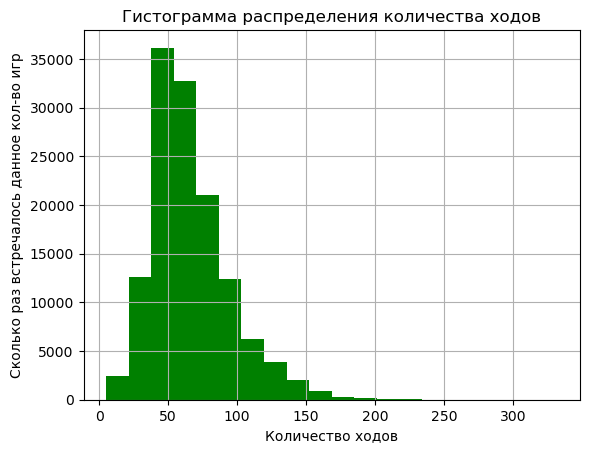

In [228]:
df['TotalMoves'].hist(bins=20, color='g')
plt.title('Гистограмма распределения количества ходов')
plt.xlabel('Количество ходов')
plt.ylabel('Сколько раз встречалось данное кол-во игр')
plt.show()

Предположения подтвердились. Как видим, всего по трём числам можно получить какую-то конструктивную информацию о распределении, если их правильно интерпретировать

Теперь отсортируем наш датафрейм по разнице в рейтинге: посмотрим на то, какой максимальный разрыв в рейтинге был между игроками. Нужно учитывать, что разница в рейтинге может быть как положительной, так и отрицательной, поэтому сортировать будем по модулю.

In [229]:
print('Топ-10 игр с наибольшей разницей в рейтинге:')
print(*list(map(abs, df.sort_values('RatingDiff', key=lambda x: -abs(x))['RatingDiff'].head(10))), sep='\n')

Топ-10 игр с наибольшей разницей в рейтинге:
1977
1708
1677
1645
1630
1615
1611
1609
1529
1496


Видим, что у нас есть игры, в которых разница в рейтинге между игроками была очень существенной: более 1500 очков эло, хотя подбор игроков работает таким образом, чтобы друг с другом играли соперники с примерно одинаковым рейтингом. Видимо, это игры, в которых игроки не пользовались подбором игр lichess.com, а сыграли друг с другом по договорённости.

Посмотрим на меры центральной тенденции:

In [230]:
mean_rating_diff = int(round(df['RatingDiff'].mean()))
median_rating_diff = int(round(df['RatingDiff'].median()))
mode_rating_diff = int(round(df['RatingDiff'].mode()))

print(f'Среднее количество ходов в партиях: {mean_rating_diff} ходов')
print(f'Медианное количество ходов в партиях: {median_rating_diff} ходов')
print(f'Модное количество ходов в партиях: {mode_rating_diff} ходов')

Среднее количество ходов в партиях: -1 ходов
Медианное количество ходов в партиях: 0 ходов
Модное количество ходов в партиях: 0 ходов


Как мы видим, скорее всего это унимодальное, симметричное распределение. Это более чем логично, так как нет оснований предполагать, что вероятность того, что белый игрок превосходит в рейтинге, больше чем вероятность того что у чёрного рейтинг больше

Вглянем на гистограмму

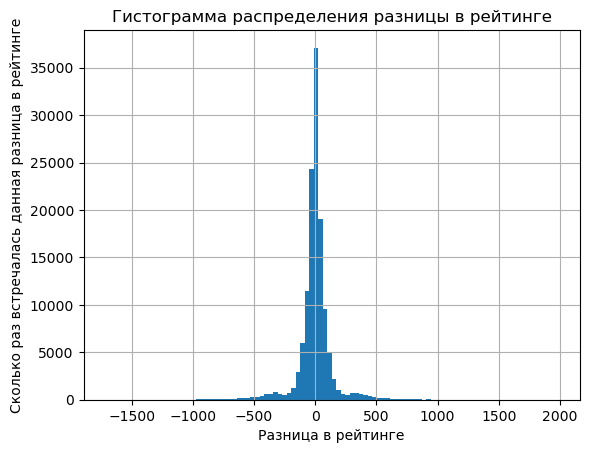

In [231]:
df['RatingDiff'].hist(bins=100)
plt.title('Гистограмма распределения разницы в рейтинге')
plt.xlabel('Разница в рейтинге')
plt.ylabel('Сколько раз встречалась данная разница в рейтинге')
plt.show()

Распределение очень похоже на нормальное, но интересно проверить, нормальное ли оно? Видим что оно обладает достаточно тяжёлыми концами. Чтобы проверить, является ли данное распределение нормальным, как вариант, можно построить QQ-plot(квантиль-квантиль плот)

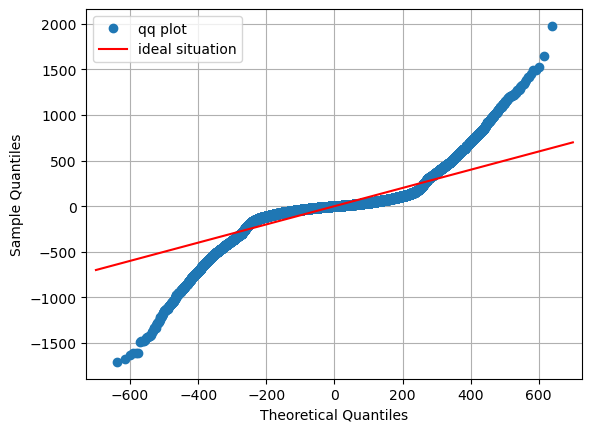

In [232]:
qqplot(df['RatingDiff'], loc=0, scale=df['RatingDiff'].std(), label='qq plot')
plt.grid()
x = np.linspace(-700, 700)
y = x
plt.plot(x, y, label='ideal situation', color='r')
plt.legend()
plt.show()

Видим отклонение графика Quantile-Quantile plot вверх от линии y=x на положительной полуоси и вниз на отрицательной, что говорит нам о том, что наше распределение действительно имеет более тяжёлые хвосты чем нормальное. Возможно, такое распределение можно описать распределением Стьюдента, которое как раз похоже на нормальное, но имеет более тяжёлые хвосты.

Посмотрим теперь на самых опытных игроков

In [233]:
white_rating = df[['White', 'White_count_all']]
white_rating.columns = ['Player', 'count_all']
black_rating = df[['White', 'White_count_all']]
black_rating.columns = ['Player', 'count_all']
rating = pd.concat((white_rating, black_rating)).groupby('Player').max()

print('Топ-10 самых опытных игроков, активных в феврале 2024')
rating.sort_values('count_all', ascending=False).head(10)

Топ-10 самых опытных игроков, активных в феврале 2024


,count_all
Player,
maia1,1775580.0
maia5,804678.0
maia9,755608.0
german11,625296.0
QueenMaster77,457774.0
suthey2,373823.0
SUTHEY2,373823.0
Hoegi,281216.0
RubbleChess,276511.0


Видим, что самый опытный игрок сыграл более полутора миллиона игр. Тут есть несколько оговорок. Во-первых, сыграть n игр в режиме пули - не то же самое, что сыграть n игр в классике. Во-вторых, игрок может сменить ник и для нас это будет как два разных игрока. С этими нюансами мы справиться не в силах, работая только с теми данными что мы имеем, поэтому данная статистика не самая репрезентативная, однако она даёт хотя бы примерное понимание о том, сколько игр сыграл самый опытный человек

Также интересно посмотреть, в какое время суток играют чаще всего. Для этого создадим новый признак hour

In [234]:
df['hour'] = df['Time'].str.split(':').str[0].astype(int)

Выведем некоторые меры центральной тенденции для нового признака

In [235]:
mean_hour = int(round(df['hour'].mean()))
median_hour = int(round(df['hour'].median()))
mode_hour = int(df['hour'].mode())

print(f'В среднем игры в шахматы проходят в {mean_hour} часов')
print(f'Медиана распределения игр по часам - {median_hour}')
print(f'Чаще всего люди играют в {mode_hour} часов')

В среднем игры в шахматы проходят в 13 часов
Медиана распределения игр по часам - 14
Чаще всего люди играют в 16 часов


Нарисуем гистограмму распределения

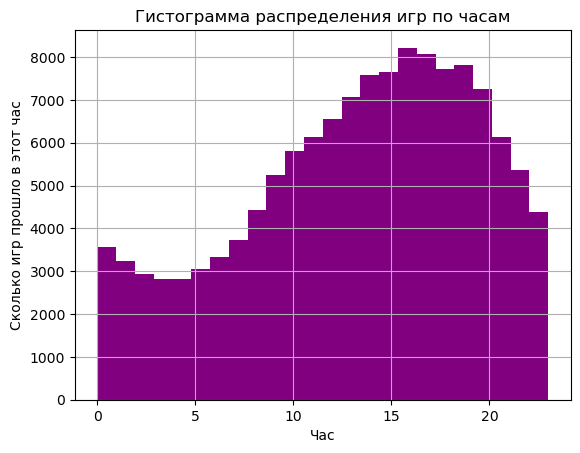

In [236]:
df['hour'].hist(bins=24, color='purple')
plt.title('Гистограмма распределения игр по часам')
plt.xlabel('Час')
plt.ylabel('Сколько игр прошло в этот час')
plt.show()

Получилась некая синусоида) Видим, что распределение имеет два экстремума - минимум и максимум. Минимум в 4 часа, максимум - в 16 часов.

Посчитаем меры центральной тенденции для некоторых других величин, для которых мы ещё этого не сделали

Посмотрим на то, какой результат игры является самым частым

In [237]:
df['Result'] = np.where(df['Result'] == '1-0', 'Победа белых', np.where(df['Result'] == '0-1', 'Победа чёрных', 'Ничья'))
result_mode = df['Result'].mode()[0]

print(f'Самый популярный результат - {result_mode}')

Самый популярный результат - Победа белых


Это ожидаемый результат. Белые имеют преимущество в шахматах за счёт прерогативы сделать первый ход. Построим частотную таблицу и нарисуем круговую диаграмму

In [238]:
round(df['Result'].value_counts(normalize=True)* 100, 2).reset_index()

,Result,proportion
0,Победа белых,50.04
1,Победа чёрных,46.48
2,Ничья,3.49


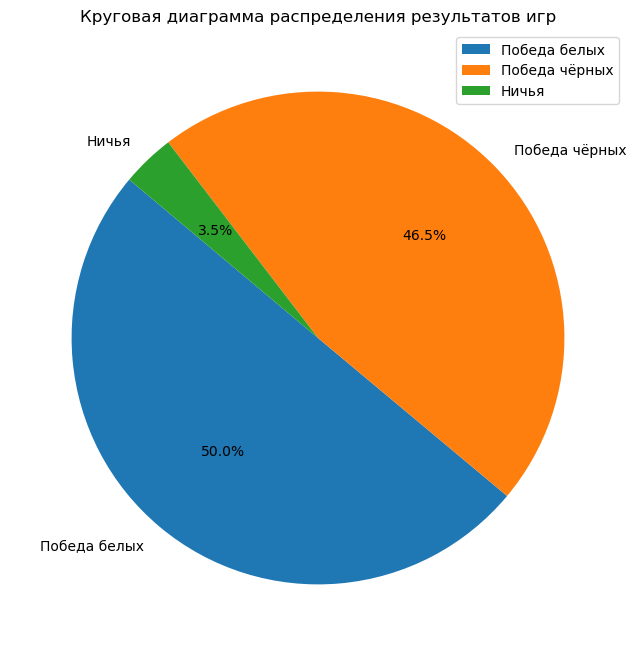

In [239]:
values = (df['Result'].value_counts(normalize=True) * 100).values
labels = (df['Result'].value_counts(normalize=True) * 100).index
plt.figure(figsize=(8, 8))
plt.pie(values, autopct='%1.1f%%', labels=labels, startangle=140)
plt.title('Круговая диаграмма распределения результатов игр')
plt.legend()
plt.show()

Посмотрим на самый часто встречающийся дебют

In [240]:
debut_mode = df['Opening'].mode()[0]

print(f'Самый часто встречающийся дебют - {debut_mode}')

Самый часто встречающийся дебют - Queen's Pawn Game: Accelerated London System


Также интересно посмотреть на самый встречающийся флаг в профиле игроков

In [241]:
flag_mode = df['White_profile_flag'].mode()[0]

print(f'Самый часто встречающийся флаг в профиле игроков - {flag_mode}')

Самый часто встречающийся флаг в профиле игроков - RU


Теперь обратим внимание на наличие выбросов в признаках. В качестве интересующих нас признаков возьмём, например, WhiteElo и разницу рейтингов RatingDiff

Начнём с WhiteElo. Построим ящик с усами для этого признака

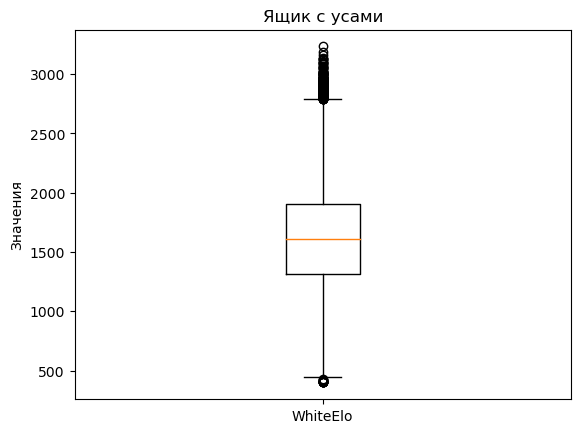

In [242]:
plt.boxplot(df['WhiteElo'])
plt.title('Ящик с усами')
plt.xticks([1], ['WhiteElo'])
plt.ylabel('Значения')
plt.show()

Видим, что есть значения, которые выходят за пределы полтора интерквартильных размаха, однако, у нас нет никаких оснований считать их выбросами и удалять. Напомним, что выброс - это измерение, выбивающееся из общей выборки, которое попало туда ввиду ошибки измерения или необычной природы входных данных. В данном случае это такие же игроки, просто более сильные

Обратим внимание на признак RatingDiff. Построим ящик с усами

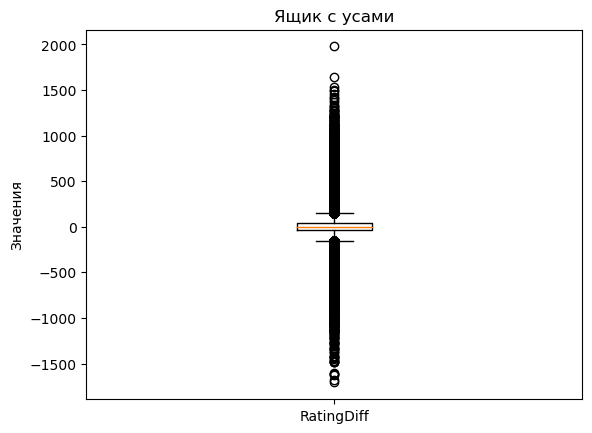

In [243]:
plt.boxplot(df['RatingDiff'])
plt.title('Ящик с усами')
plt.xticks([1], ['RatingDiff'])
plt.ylabel('Значения')
plt.show()

Подбор игр на lichess.com работает таким образом, что между собой встречаются игроки с примерно одинаковым рейтингом. Большая разница в рейтинге может возникать тогда, когда игроки играют между собой по договорённости. Поэтому такие игры мы вполне законно можем считать выбросами и исключить из нашего датафрейма

Вычислим выбросы с помощью межквартильного размаха

Чтобы понять, как повлияло удаление выбросов на наш датасет, выведем тут МЦТ для некоторых признаков

In [244]:
mean_white = df['WhiteElo'].mean()
median_white = df['WhiteElo'].median()
mode_white = df['WhiteElo'].mode()[0]

mean_rate_diff = df['RatingDiff'].mean()
median_rate_diff = df['RatingDiff'].median()
mode_rate_diff = df['RatingDiff'].mode()[0]

mean_total_moves = df['TotalMoves'].mean()
median_total_moves = df['TotalMoves'].median()
mode_total_moves = df['TotalMoves'].mode()[0]

mode_opening = df['Opening'].mode()[0]

mode_result = df['Result'].mode()[0]

print(f'''Средний рейтинг белых игроков: {round(mean_white)};
Медиана рейтинга белых игроков: {median_white};
Мода рейтинга белых игроков: {mode_white}

Средняя разница рейтинга между игроками: {round(mean_rate_diff)};
Медиана разницы рейтинга: {median_rate_diff};
Мода разницы рейтинга: {mode_rate_diff}

Среднее количество ходов в партиях: {round(mean_total_moves)};
Медианное количество ходов в партиях: {median_total_moves};
Мода количества ходов в партиях: {mode_total_moves}

Самый часто встречающийся дебют: {mode_opening}

Самый частый результат игры: {mode_result}''')

Средний рейтинг белых игроков: 1618;
Медиана рейтинга белых игроков: 1610.0;
Мода рейтинга белых игроков: 1500

Средняя разница рейтинга между игроками: -1;
Медиана разницы рейтинга: 0.0;
Мода разницы рейтинга: 0

Среднее количество ходов в партиях: 66;
Медианное количество ходов в партиях: 61.0;
Мода количества ходов в партиях: 51

Самый часто встречающийся дебют: Queen's Pawn Game: Accelerated London System

Самый частый результат игры: Победа белых


Гистограмма распределения результата игр

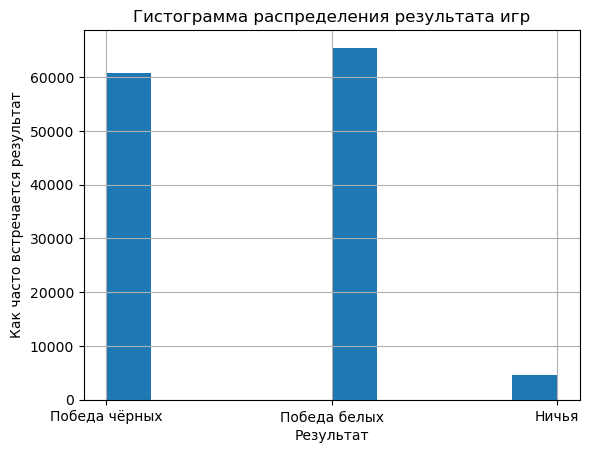

In [245]:
df['Result'].hist()
plt.title('Гистограмма распределения результата игр')
plt.xlabel('Результат')
plt.ylabel('Как часто встречается результат')
plt.show()

In [246]:
Q1 = df['RatingDiff'].quantile(0.25)
Q3 = df['RatingDiff'].quantile(0.75)
IQR = Q3 - Q1

lower_iqr = Q1 - 1.5 * IQR
upper_iqr = Q3 + 1.5 * IQR

outliers_iqr = df[(df['RatingDiff'] < lower_iqr) | (df['RatingDiff'] > upper_iqr)]

Сделаем то же самое с помощью среднеквадратичного отклонения

In [247]:
mean = df['RatingDiff'].mean()
std_dev = df['RatingDiff'].std()

lower_std = mean - 3 * std_dev
upper_std = mean + 3 * std_dev

outliers_std = df[(df['RatingDiff'] < lower_std) | (df['RatingDiff'] > upper_std)]

In [248]:
min_iqr = abs(min(outliers_iqr['RatingDiff'], key=lambda x: abs(x)))
min_std = abs(min(outliers_std['RatingDiff'], key=lambda x: abs(x)))

print('Количество выбросов\n')
print(f'С помощью межквартильного размаха: {len(outliers_iqr)}')
print(f'С помощью среднеквадратичного отклонения: {len(outliers_std)}\n')
print('Минимальное по модулю значение, которое мы считаем выбросом\n')
print(f'С помощью межквартильного размаха: {min_iqr}')
print(f'С помощью среднеквадратичного отклонения: {min_std}')

Количество выбросов

С помощью межквартильного размаха: 14789
С помощью среднеквадратичного отклонения: 3613

Минимальное по модулю значение, которое мы считаем выбросом

С помощью межквартильного размаха: 154
С помощью среднеквадратичного отклонения: 443


В нашем случае метод межквартильного размаха оказался весьма более радикальным по сравнению со среднеквадратичным отклонением. Хотя, вообще говоря, метод межквартильного размаха считается более консервативным и мягким в деле обнаружения выбросов. Такое поведение этих методов связано с особенностями нашего распределения: у нас очень много измерений сосредоточено возле нуля, но также есть множество измерений, которые существенно отклоняются от этого значения. 
Конкретно в данной ситуации выберем метод межквартильного размаха, так как разница в 154 эло между шахматистами для нас уже кажется достаточно большой.
В целом, выбирать метод стоит исходя из конкретной ситуации, а лучше сделать как мы сейчас: наглядно увидеть, какие выбросы фиксирует тот и другой метод и сколько их и на основании этого уже принимать решение, какой метод более близок к тому, что мы называем выбросами.
Если говорить в общем, то надо понимать недостатки обоих методов. Метод межквартильного размаха, например, не учитывает разброс в распределении. Если распределение само по себе пологое, то данный метод лучше не использовать, так как он может несправедливо порезать вполне релевантные измерения. Метод среднеквадратичного отклонения же более чувствителен к форме распределения данных и в случае когда у нас распределение несимметрично и/или у него имеются тяжёлые хвосты, метод среднеквадратичного отклонения может удалить достаточно много хороших данных

In [249]:
truncated = df[(df['RatingDiff'] >= lower_iqr) & (df['RatingDiff'] <= upper_iqr)]
print(f'Мы удалили {round((len(df) - len(truncated)) / len(df) * 100, 2)}% измерений')

Мы удалили 11.3% измерений


Посчитаем теперь меры центральной тенденции

In [250]:
new_mean_white = truncated['WhiteElo'].mean()
new_median_white = truncated['WhiteElo'].median()
new_mode_white = truncated['WhiteElo'].mode()[0]

new_mean_rate_diff = truncated['RatingDiff'].mean()
new_median_rate_diff = truncated['RatingDiff'].median()
new_mode_rate_diff = truncated['RatingDiff'].mode()[0]

new_mean_total_moves = truncated['TotalMoves'].mean()
new_median_total_moves = truncated['TotalMoves'].median()
new_mode_total_moves = truncated['TotalMoves'].mode()[0]

new_mode_opening = truncated['Opening'].mode()[0]

new_mode_result = truncated['Result'].mode()[0]

print(f'''Средний рейтинг белых игроков: {round(mean_white)}, изменился на {round((new_mean_white - mean_white) / mean_white * 100, 2)}%;
Медиана рейтинга белых игроков: {new_median_white}, изменилась на {round((new_median_white - median_white) / median_white * 100, 2)}%;
Мода рейтинга белых игроков: {new_mode_white}, изменилась на {round((new_mode_white - mode_white) / mode_white * 100, 2)}%

Средняя разница рейтинга между игроками: {round(new_mean_rate_diff)};
Медиана разницы рейтинга: {new_median_rate_diff};
Мода разницы рейтинга: {new_mode_rate_diff}

Среднее количество ходов в партиях: {round(new_mean_total_moves)}, изменилось на {round((new_mean_total_moves - mean_total_moves) / mean_total_moves * 100, 2)}%;
Медианное количество ходов в партиях: {new_median_total_moves}, изменилась на {round((new_median_total_moves - median_total_moves) / median_total_moves * 100, 2)}%;
Мода количества ходов в партиях: {new_mode_total_moves}, изменилась на {round((new_mode_total_moves - mode_total_moves) / mode_total_moves * 100, 2)}%

Самый часто встречающийся дебют: {new_mode_opening}

Самый частый результат игры: {new_mode_result}''')

Средний рейтинг белых игроков: 1618, изменился на -0.82%;
Медиана рейтинга белых игроков: 1597.0, изменилась на -0.81%;
Мода рейтинга белых игроков: 1500, изменилась на 0.0%

Средняя разница рейтинга между игроками: 0;
Медиана разницы рейтинга: 0.0;
Мода разницы рейтинга: 0

Среднее количество ходов в партиях: 66, изменилось на -0.05%;
Медианное количество ходов в партиях: 61.0, изменилась на 0.0%;
Мода количества ходов в партиях: 51, изменилась на 0.0%

Самый часто встречающийся дебют: Queen's Pawn Game: Accelerated London System

Самый частый результат игры: Победа белых


Новая гистограмма распределения результата игр

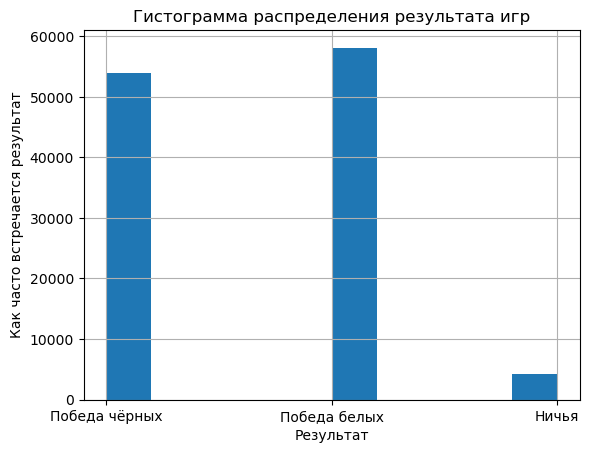

In [251]:
truncated['Result'].hist()
plt.title('Гистограмма распределения результата игр')
plt.xlabel('Результат')
plt.ylabel('Как часто встречается результат')
plt.show()

Из изменений видим что немного упали медиана и среднее рейтинга белых игроков. Это связано с тем что мы удалили много игр с высокорейтинговыми игроками. МЦТ у остальных рассматриваемых признаков и гистограмма распределения результатов игр остались неизменными

Теперь посмотрим на то, есть ли в столбцах нашего датафрейма пропущенные значения

In [252]:
truncated.isna().sum()

GameID                       0
Event                        0
Round                        0
Site                         0
Date                         0
Time                         0
White                        0
WhiteElo                     0
WhiteRatingDiff            257
White_is_deleted             0
White_tosViolation      114488
White_profile_flag       83055
White_createdAt           2179
White_playTime_total      2277
White_count_all           2179
White_title             114282
Black                        0
BlackElo                     0
BlackRatingDiff            257
Black_is_deleted             0
Black_tosViolation      114493
Black_profile_flag       83034
Black_createdAt           2128
Black_playTime_total      2208
Black_count_all           2128
Black_title             114228
Moves                        0
TotalMoves                   0
ECO                          0
Opening                      0
TimeControl                  0
Termination                  0
Result  

Видим наличие пропущенных значений в столбцах WhiteRatingDiff и BlackRatingDiff. Эти значения пропущены в тех играх, где хотя бы один игрок нарушил правила, так как эти игры, по всей видимости не засчитываются и рейтинг у игроков не меняется

В колонке White/Black_tosViolation значение NaN соответствует False

В колонках White/Black_profile_flag значение NaN соответствует ситуации, когда у игрока не установлен флаг в профиле

В колонках White/Black_title значение NaN соответствует ситуации, когда у игрока нет никаких шахматных титулов

В колонках White/Black_createdAt и White/Black_count_all значения NaN соответствуют, по всей видимости, незарегистрированным игрокам

В колонках White/Black_playTime_total значения NaN соответствуют, по всей видимости, незарегистрированным игрокам и игрокам, которые зарегистрировались, но до этого не успели сыграть ещё ни одной партии

В колонке TimeControl_type значения NaN стоят только в тех играх, которые были сыграны в рамках ивента под названием "Rated Correspondence game". Почему-то на этом ивенте значение временного контроля оказалось недоступным. В колонке TimeControl значениям NaN соответствуют '-'

Теперь посмотрим на корреляции, которые наличествуют в наших данных. Для этого построим матрицу корреляции. Предварительно, перекодируем значения в колонке Result следующим образом: Победа белых = 1, Победа чёрных = -1, Ничья = 0

In [253]:
d = {
    'Победа белых': 1,
    'Ничья': 0,
    'Победа чёрных': -1
}

truncated['Result'] = truncated['Result'].map(d)

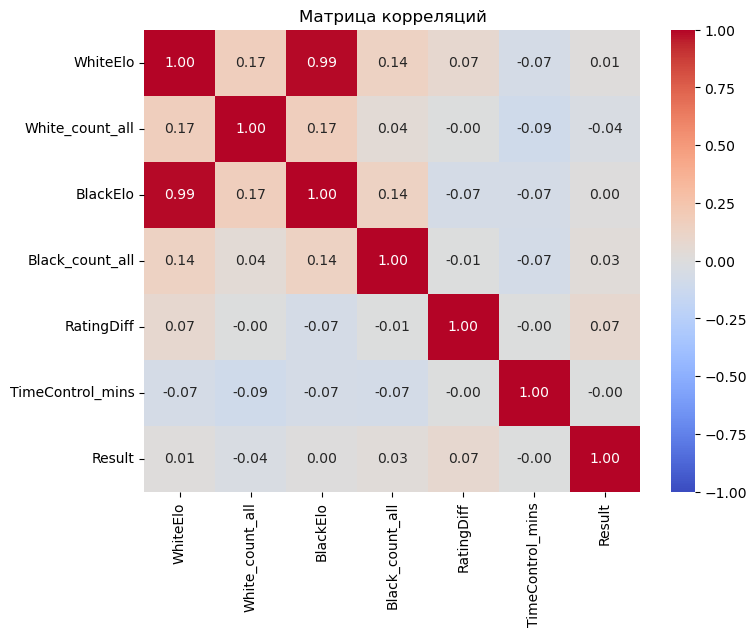

In [254]:
truncated['TimeControl_mins'] = truncated['TimeControl'].str.split('+').str[0].replace('-', -1).astype(int)#временной контроль в минутах
corr_columns = ['WhiteElo', 'White_count_all', 'BlackElo', 'Black_count_all', 'RatingDiff', 'TimeControl_mins', 'Result']

corr_matrix = truncated[corr_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

Построим диаграммы рассеяния

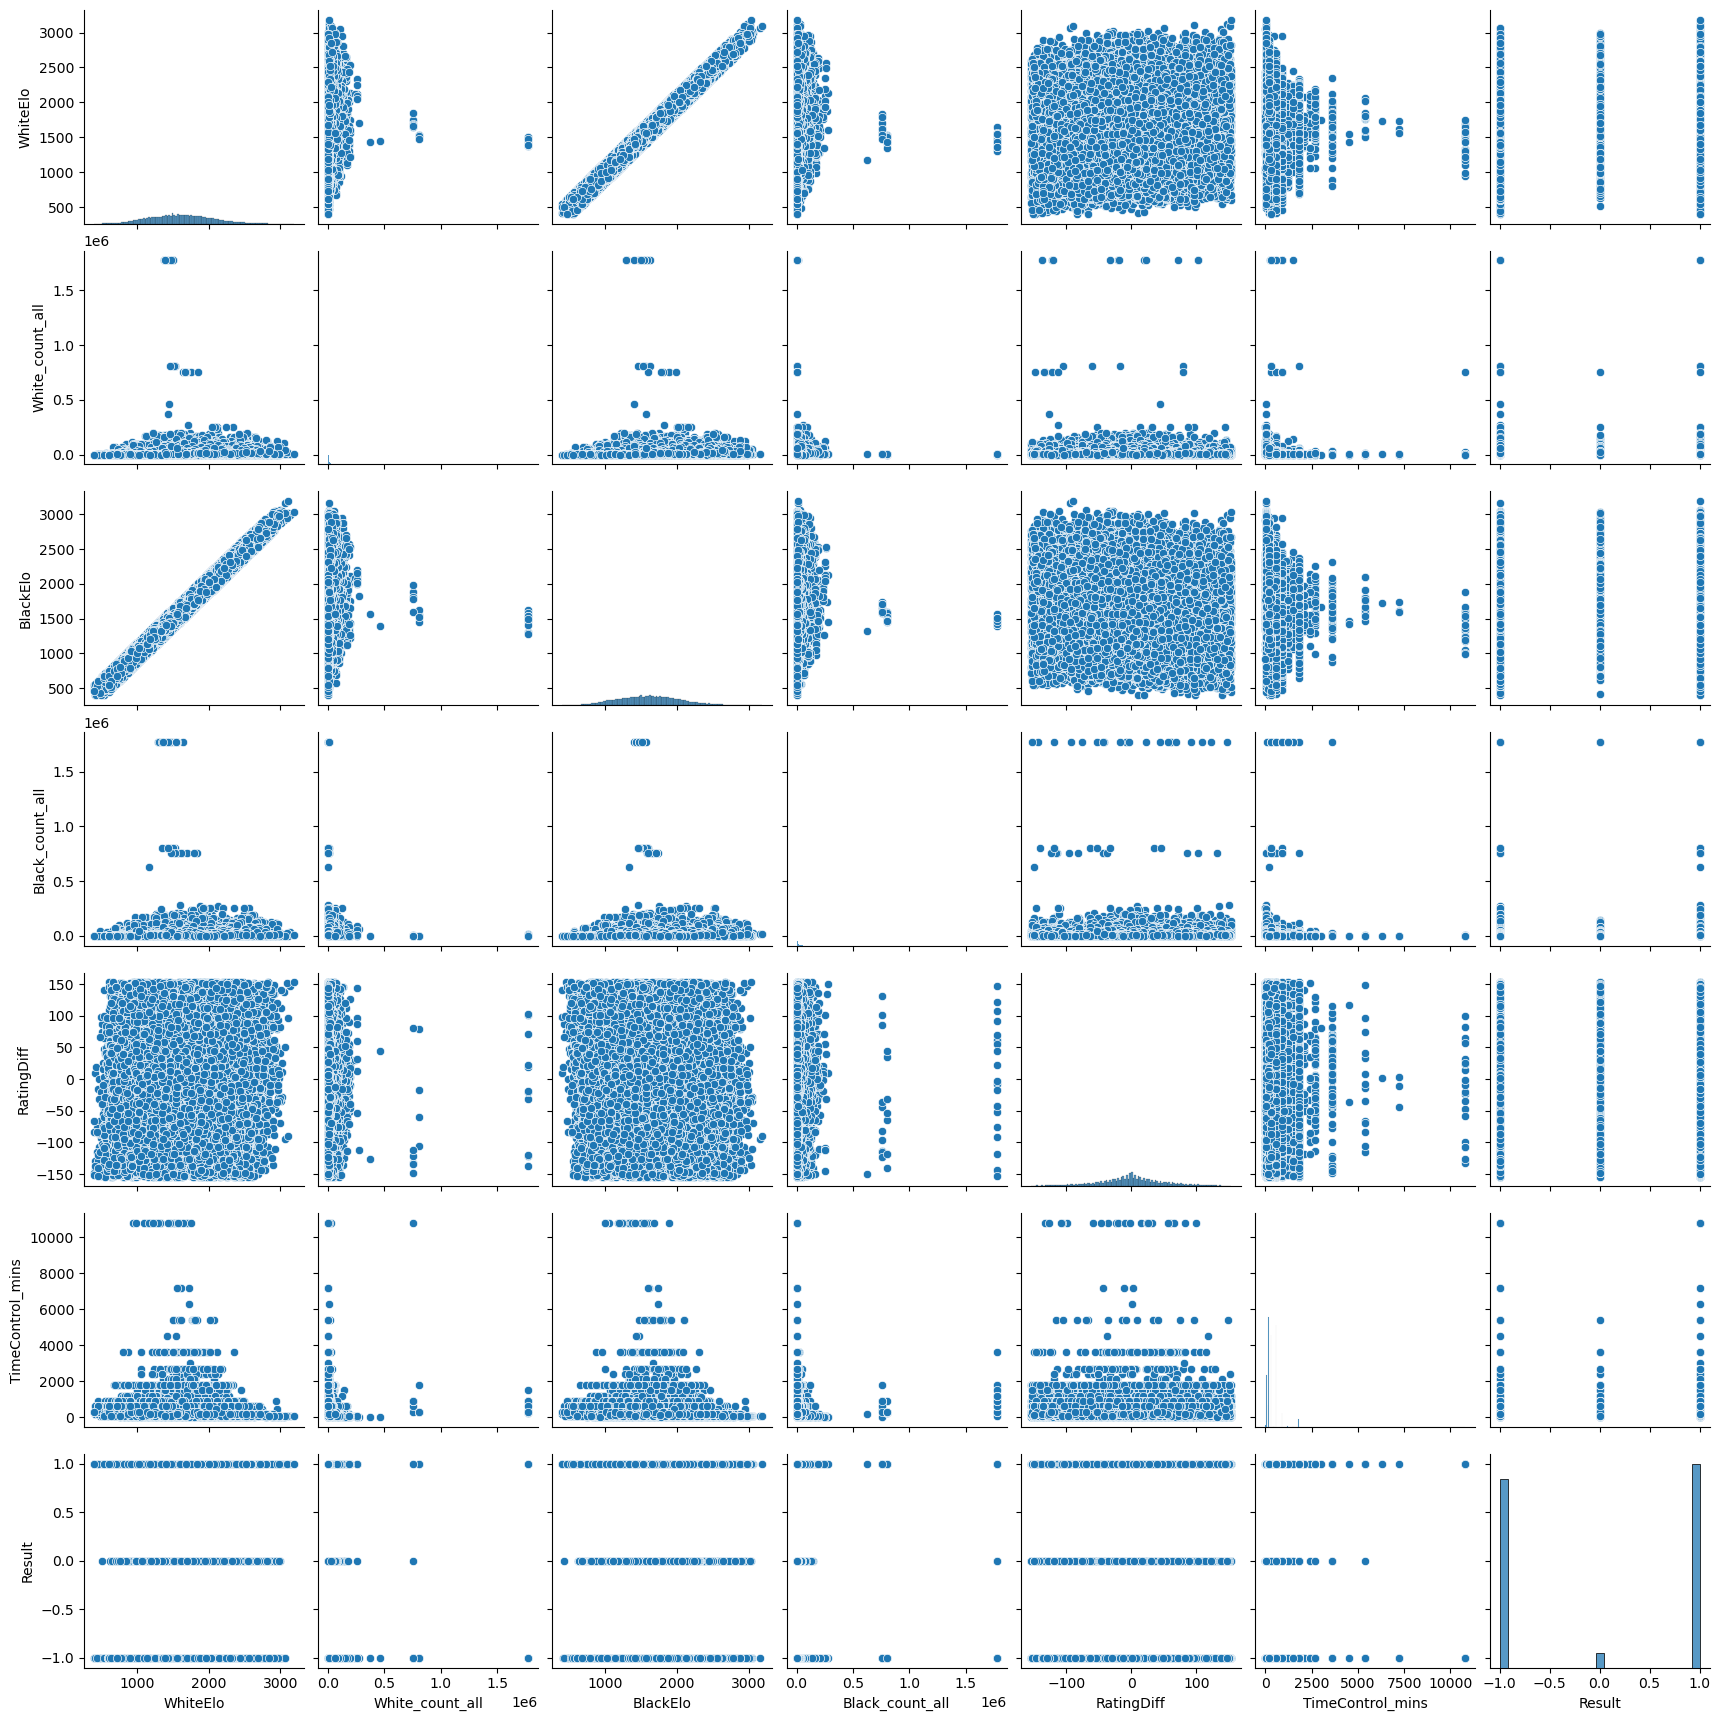

In [255]:
sns.pairplot(truncated[corr_columns])
plt.show()

Проинтерпретируем результаты. Видим, что есть положительная корреляция между рейтингом игрока и количеством сыгранных игр, что достаточно логично(эта корреляция была бы больше, если бы мы убрали выбросы в виде игроков, которые сыграли много игр и находятся при этом на относительно низком рейтинге). Также есть корреляция между рейтингом белого и чёрного игрока. Это тоже совершенно очевидно, так как игроки, опять же, подбираются по возможности с одинаковым уровнем игры(эта корреляция более сильная чем в исходном датафрейме, так как мы обрезали те игры, где разница в рейтинге была значительной). Видим небольшую положительную корреляцию между рейтингом белых игроков и разнице в рейтинге(а как следствие, отрицательную корреляцию между рейтингом чёрных игроков и разнице в рейтинге). То есть, в более высокорейтинговых играх рейтинг белого игрока начинает чаще превосходить рейтинг чёрного игрока. Это интересный инсайт, возможно это особенность подбора игр на личессе. Также есть небольшая отрицательная корреляция между рейтингом игрока и временным контролем партии. Это может означать что высокорейтинговые игроки склонны выбирать более быстрые режимы. Ещё можем заметить положительную корреляцию между результатом и разнице в рейтинге. Интерпретировать это можно как то, что чем больше разница рейтинга между игроками в сторону белого, тем больше вероятность победы белого шахматиста, что тоже достаточно очевидное утверждение

Попробуем удалить игроков, которые сыграли много игр и находятся на относительно низком рейтинге

In [256]:
truncated2 = truncated[~((truncated['White_count_all'] > 100000) & (truncated['WhiteElo'] < 2100))]

Пересчитаем корреляцию между эло и количеством сыгранных игр

In [257]:
corr = truncated2['WhiteElo'].corr(truncated2['White_count_all'])

print(f'Значение корреляции между эло и количеством сыгранных игр - {round(corr, 2)}')

Значение корреляции между эло и количеством сыгранных игр - 0.33


Действительно, значение корреляции стало существенно выше